Go to the following notebook copy it on your drive and apply the necessary ML  algorithm for a given dataset.   Evaluate the model using one feature and multiple features. Use the feature selection technique to select one feature. https://colab.research.google.com/drive/1GwS2JdNH0Qplbg8P-e-L22Vnnx5x7hcM?usp=sharing
Regression problem: Single and Multiple
Y= sales
Predict sales: LinearRegression(), SVR()
Build a streamlit application that can predict sales based on TV ads.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


# Loading and Exploring Data

In [2]:
data = pd.read_csv('ads.csv')
print(data.head())
print(data.info())
print(data.describe())


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

# Feature Selection

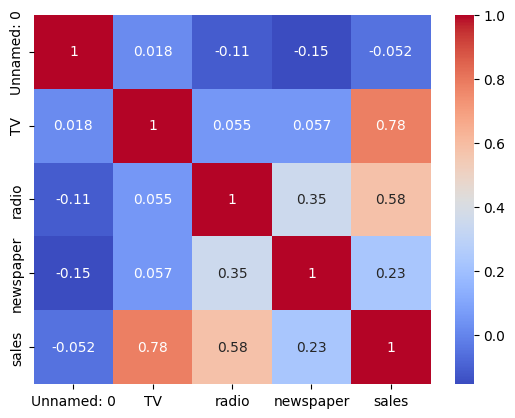

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64


In [3]:
# Correlation analysis
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Selecting the most correlated feature
corr_matrix = data.corr()
print(corr_matrix['sales'].sort_values(ascending=False))


# Train-Test Split

In [4]:
# Defining features and target
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

# Splitting data for single-feature (TV only) and multiple-feature models
X_single = data[['TV']]
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling and Evaluation
* Single-Feature Linear Regression
* Multiple-Feature Linear Regression
* Single-Feature SVR
* Multiple-Feature SVR

In [8]:
# Linear Regression with single feature (TV)
lr_single = LinearRegression()
lr_single.fit(X_train_single, y_train_single)
y_pred_single_lr = lr_single.predict(X_test_single)

# Evaluation
print("Single-Feature Linear Regression (TV) Results:")
print("MSE:", mean_squared_error(y_test_single, y_pred_single_lr))
print("R² Score:", r2_score(y_test_single, y_pred_single_lr))


Single-Feature Linear Regression (TV) Results:
MSE: 10.204654118800956
R² Score: 0.6766954295627076


In [9]:
# Linear Regression with multiple features
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)
y_pred_multiple_lr = lr_multiple.predict(X_test)

# Evaluation
print("Multiple-Feature Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_multiple_lr))
print("R² Score:", r2_score(y_test, y_pred_multiple_lr))


Multiple-Feature Linear Regression Results:
MSE: 3.1740973539761033
R² Score: 0.899438024100912


In [10]:
# SVR with single feature (TV)
svr_single = SVR(kernel='linear')
svr_single.fit(X_train_single, y_train_single)
y_pred_single_svr = svr_single.predict(X_test_single)

# Evaluation
print("Single-Feature SVR (TV) Results:")
print("MSE:", mean_squared_error(y_test_single, y_pred_single_svr))
print("R² Score:", r2_score(y_test_single, y_pred_single_svr))


Single-Feature SVR (TV) Results:
MSE: 10.202161735868959
R² Score: 0.6767743934142809


In [11]:
# SVR with multiple features
svr_multiple = SVR(kernel='linear')
svr_multiple.fit(X_train, y_train)
y_pred_multiple_svr = svr_multiple.predict(X_test)

# Evaluation
print("Multiple-Feature SVR Results:")
print("MSE:", mean_squared_error(y_test, y_pred_multiple_svr))
print("R² Score:", r2_score(y_test, y_pred_multiple_svr))


Multiple-Feature SVR Results:
MSE: 3.6012373204133694
R² Score: 0.8859053456036396


# Building Streamlit Application

In [15]:
!pip install streamlit # I don't know why streamlit missing error were displayed.

In [18]:
# Streamlit app to predict sales based on TV ads
import streamlit as st
import numpy as np

# Define the Streamlit interface
st.title("Sales Prediction App")
st.write("Predict sales based on TV advertising spend using a Linear Regression model.")

# Input from user
tv_budget = st.slider("TV Advertising Budget ($)", 0.0, 300.0, 150.0)

# Predict sales using the single-feature Linear Regression model (based on TV)
predicted_sales = lr_single.predict(np.array(tv_budget).reshape(-1, 1))

# Display prediction
st.write(f"Predicted Sales: ${predicted_sales[0]:.2f} thousand")


2024-12-06 16:36:07.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 16:36:07.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 16:36:07.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 16:36:07.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 16:36:07.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 16:36:07.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 16:36:07.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 16:36:07.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar